# Предсказание оттока пользователей

Эта задача очень важна на практике и алгоритмы для ее решения используются в реальных телеком компаниях, ведь если мы знаем, что клиент собирается уйти от нас, то мы попытаться удержать его, предложив какие-то бонусы.

## 1. Исследование данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 41.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 9.74MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 31.2MB/s]


In [3]:
data = pd.read_csv("train.csv")
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


<h2>Истолкование представленных признаков</h2>

«Клиентский период», «Ежемесячные расходы», «Общая сумма расходов», «Пол», «Пожилой гражданин», «Имеет партнера», «Имеет ребенка», «Имеет телефонную связь», «Имеет несколько номеров телефонов», «Имеет интернет-подключение», «Имеет службу онлайн-безопасности», «Имеет онлайн-резервное копирование», «Имеет защиту устройства», «Имеет доступ к технической поддержке», «Имеет онлайн-телевидение», «Имеет подписку на фильмы», «Имеет контрактный телефон», «Бухгалтерская оплата без использования бумаги», «Способ оплаты», «Отток клиентов»

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
data.isnull().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [9]:
data[data.duplicated()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1384,1,69.90,69.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
1474,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1636,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1959,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
2036,1,69.35,69.35,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2586,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,1
2877,1,70.10,70.1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2991,1,20.90,20.9,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3660,1,20.45,20.45,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3749,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


<h2>Разобьём признаки на таблицу категориальных признаков и численных</h2>

Признак "TotalSpent" имел пропуски и тип object. Все строки с пропусками были удалены

In [7]:
numeric_data = data[num_cols].copy()
numeric_data['TotalSpent'] = numeric_data['TotalSpent'].str.strip()
numeric_data['TotalSpent'] = pd.to_numeric(numeric_data['TotalSpent'], errors='coerce')


## Обработка и визуализация численных признаков

In [10]:
numeric_data = numeric_data.dropna().reset_index(drop=True)

In [11]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5273 non-null   int64  
 1   MonthlySpending  5273 non-null   float64
 2   TotalSpent       5273 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 123.7 KB


Также удалим строки с пропусками из главного датасета

In [12]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data = data.dropna().reset_index(drop=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

<h2>Гистограмма численных признаков</h2>

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

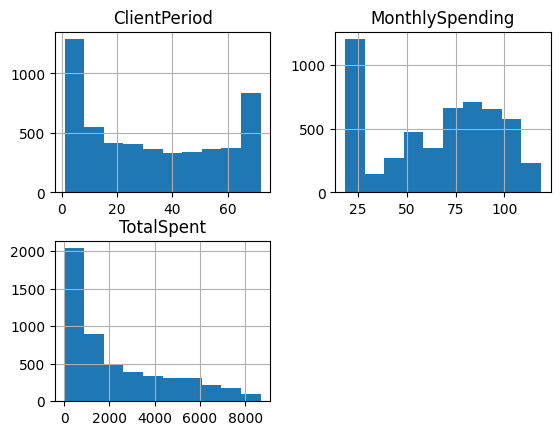

In [14]:
numeric_data.hist()

## Категориальные признаки

In [15]:
cat_data = data[cat_cols].copy()
cat_data

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5269,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5270,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5271,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [16]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sex                       5273 non-null   object
 1   IsSeniorCitizen           5273 non-null   int64 
 2   HasPartner                5273 non-null   object
 3   HasChild                  5273 non-null   object
 4   HasPhoneService           5273 non-null   object
 5   HasMultiplePhoneNumbers   5273 non-null   object
 6   HasInternetService        5273 non-null   object
 7   HasOnlineSecurityService  5273 non-null   object
 8   HasOnlineBackup           5273 non-null   object
 9   HasDeviceProtection       5273 non-null   object
 10  HasTechSupportAccess      5273 non-null   object
 11  HasOnlineTV               5273 non-null   object
 12  HasMovieSubscription      5273 non-null   object
 13  HasContractPhone          5273 non-null   object
 14  IsBillingPaperless      

<h2>Круговые диаграммы категориальных признаков</h2>

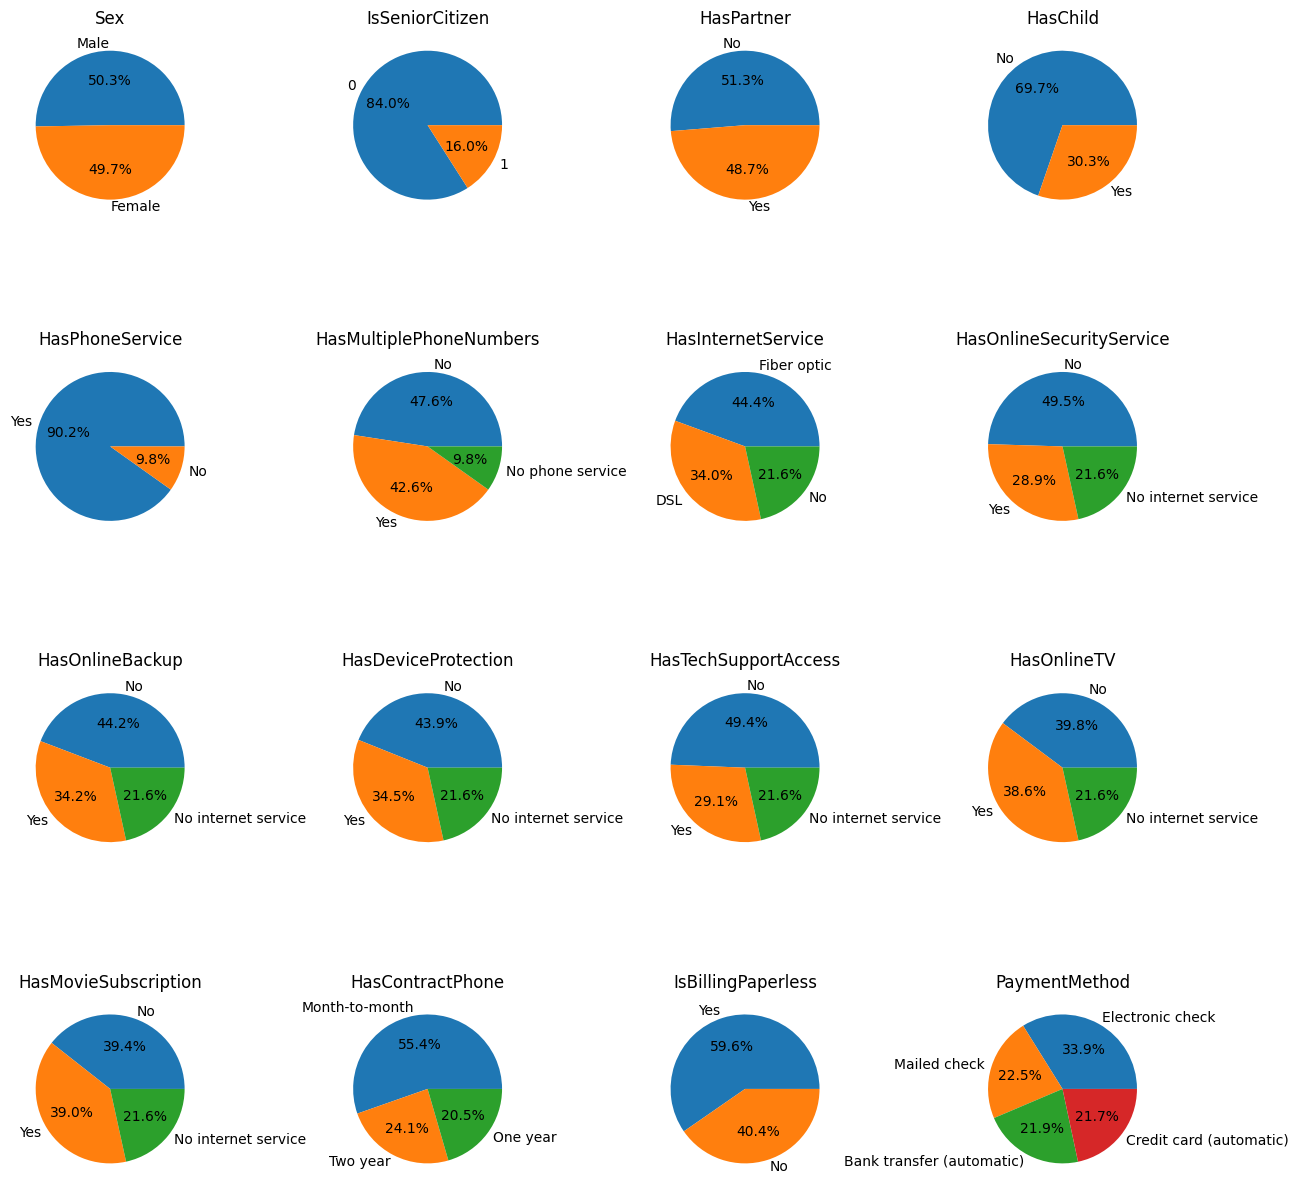

In [17]:
categories = cat_data.columns

fig, axes = plt.subplots(4, 4, figsize=(13, 13))
axes = axes.flatten()

for ax, category in zip(axes, categories):
    # Получаем значения и их частоты
    counts = cat_data[category].value_counts()

    # Строим круговую диаграмму
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
    ax.set_title(category)

plt.tight_layout()
plt.show()

<h2>BAR диаграммы категориальных признаков</h2>

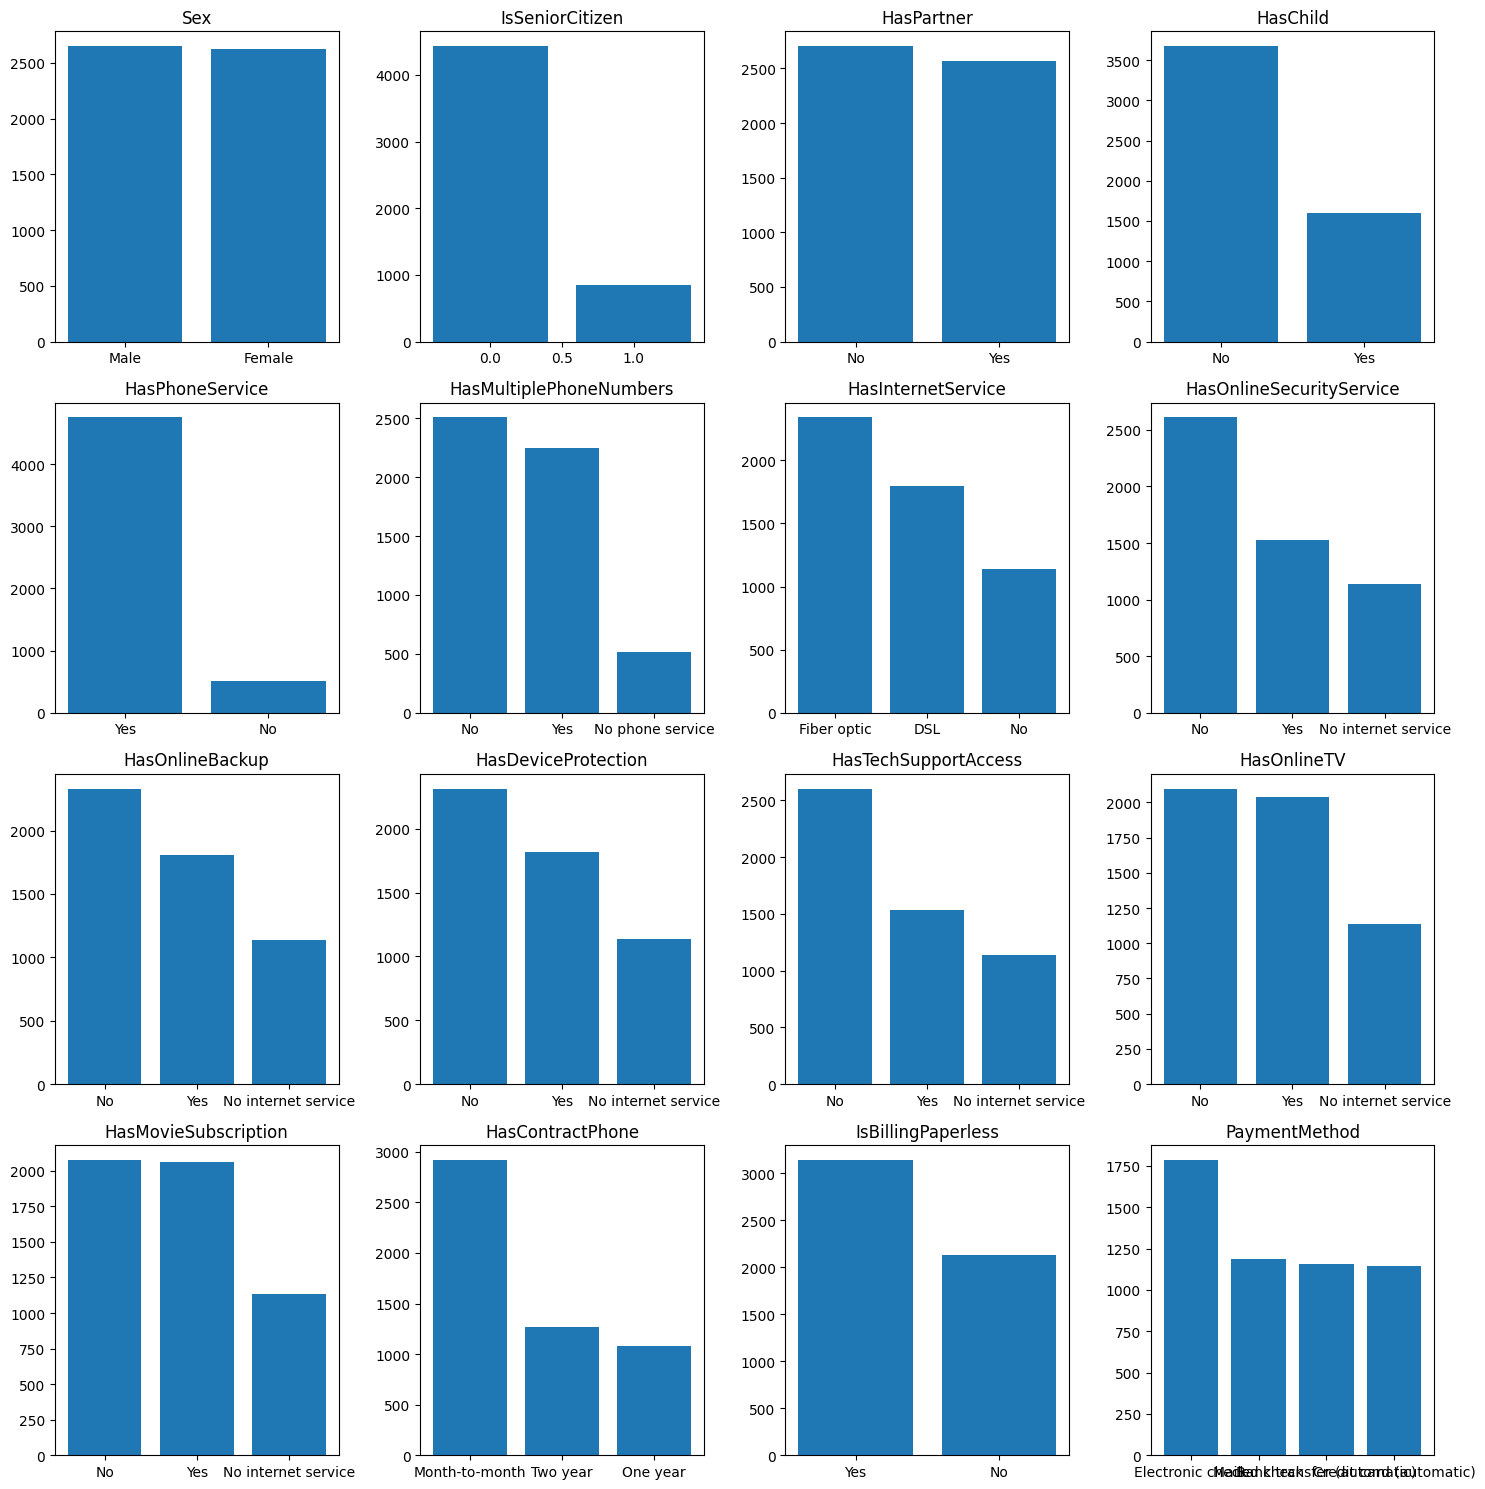

In [18]:

# Получаем список категориальных признаков
categorical_columns = cat_data.columns

# Количество подграфиков
num_cols = len(categorical_columns)

# Создаем фигуру и оси для подграфиков
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.ravel()

# Проходим по каждому категориальному признаку и строим диаграмму
for ax, col in zip(axes, categorical_columns):
    value_counts = cat_data[col].value_counts()
    ax.bar(value_counts.keys(), value_counts.values, label=col)
    ax.set_title(col)

plt.tight_layout()
plt.show()

<h2>Проверим на сбалансированность целевую переменную:</h2>

([<matplotlib.patches.Wedge at 0x7d9a0881e4d0>,
 [Text(-0.7467590456276939, 0.8076824424074204, '0'),
  Text(0.7467590456276938, -0.8076824424074206, '1')],
 [Text(-0.4073231157969239, 0.4405540594949566, '73.8%'),
  Text(0.4073231157969238, -0.44055405949495663, '26.2%')])

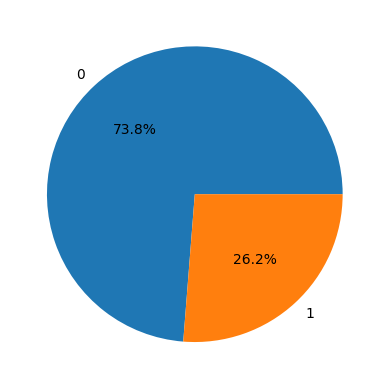

In [19]:
fig, ax = plt.subplots()

counts = data["Churn"].value_counts()

ax.pie(counts, labels=counts.index, autopct='%1.1f%%')

*Данные не сбалансированны, категория "0" больше в три раза. Можно попробовать методы борьбы с imbalanced dataset*

## Подготовим датасет к моделям

Закодируем категориальны признаки с помощью get_dummies() и соединим числовые с категориальными признаками в общий датафрейм

In [30]:
dummy_features = pd.get_dummies(cat_data)

In [31]:
X = pd.concat([dummy_features, numeric_data], axis=1)
X.head()

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ClientPeriod,MonthlySpending,TotalSpent
0,0,False,True,False,True,False,True,False,True,True,...,False,True,False,False,False,False,True,55,19.50,1026.35
1,0,False,True,False,True,True,False,False,True,False,...,True,True,False,False,True,False,False,72,25.85,1872.20
2,0,False,True,True,False,True,False,False,True,True,...,False,False,True,False,False,True,False,1,75.90,75.90
3,1,True,False,False,True,True,False,False,True,False,...,False,True,False,False,False,False,True,32,79.30,2570.00
4,0,True,False,False,True,False,True,False,True,False,...,True,True,False,False,True,False,False,60,115.25,6758.45


In [32]:
y = data['Churn']
y.head()

,Churn
0,0
1,0
2,1
3,0
4,0


## Обучим модель логистической регресии и подберём наилучший параметр C

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [35]:


mp = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

parametres = {'logisticregression__C': [100, 20, 10, 1, 0.1, 0.01, 0.001]}

grid_search = GridSearchCV(mp, parametres, cv=5, scoring="roc_auc", refit=True)

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка:", grid_search.best_score_)

Лучшие параметры: {'logisticregression__C': 10}
Лучшая оценка: 0.8447403079320471


In [36]:
from sklearn.metrics import roc_auc_score, roc_curve

In [37]:
y_test_predicted, y_train_predicted = grid_search.predict_proba(X_test)[:, 1], grid_search.predict_proba(X_train)[:, 1]
test_auc, train_auc = [roc_auc_score(y_test, y_test_predicted), roc_auc_score(y_train, y_train_predicted)]

print("test_auc = ", test_auc, "train_auc = ", train_auc)

test_auc =  0.8438924274593065 train_auc =  0.8497370914231247


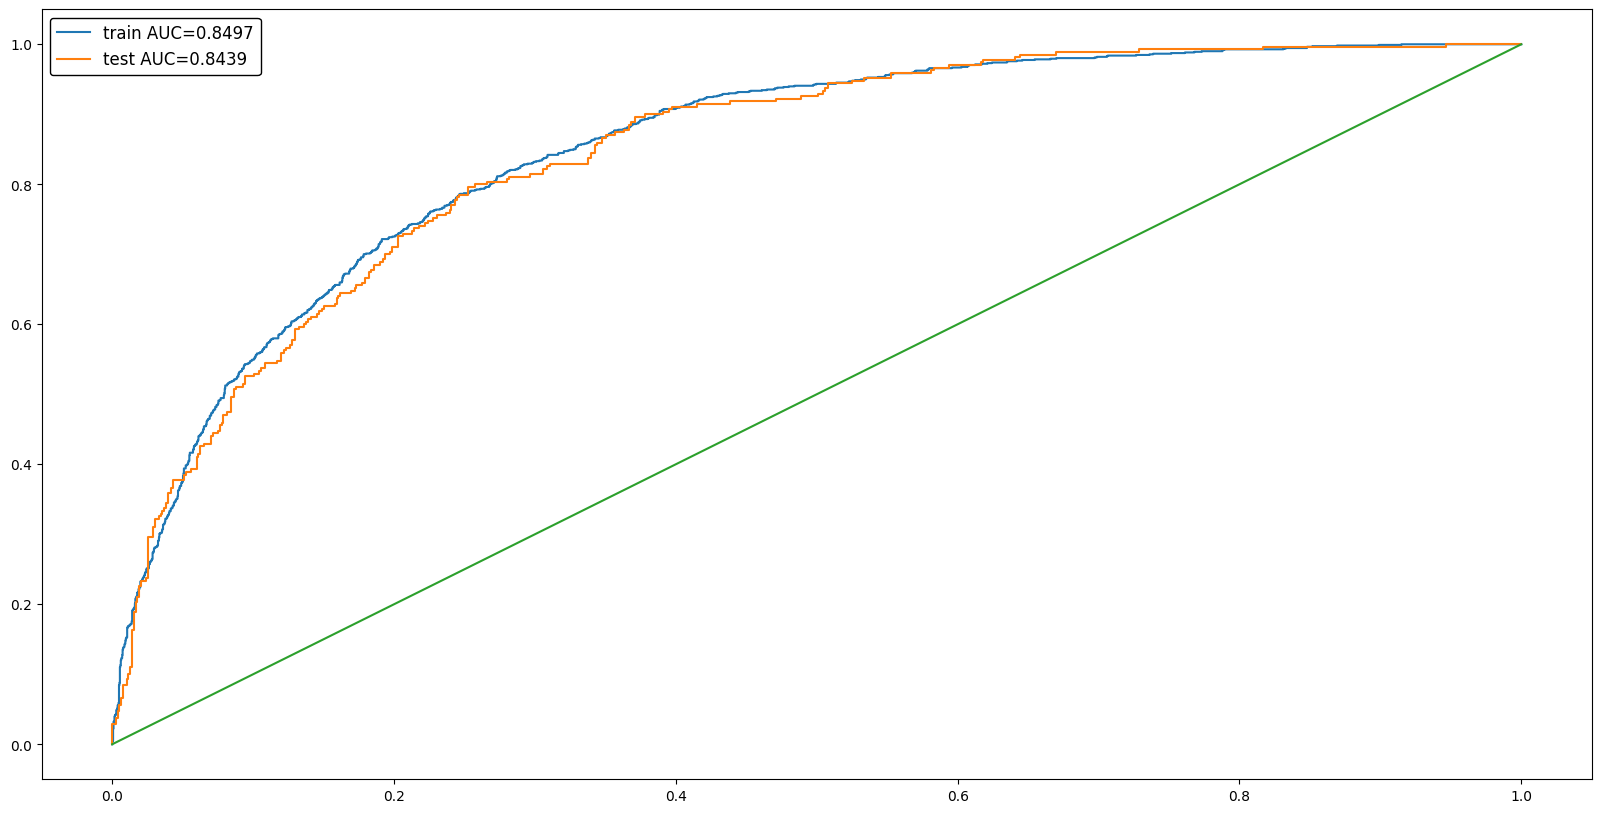

In [38]:
plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

`Логистическая регрессия` с подобранным параметром С = 10 дала результат *roc_auc = 0.8497 на тренировке* и *roc_auc = 0.8439 на тесте*

## Метод К ближайших соседей

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
mp_knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

parameters_knn = {"kneighborsclassifier__n_neighbors": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  "kneighborsclassifier__n_jobs": [-1]
                  }

grid_search_knn = GridSearchCV(mp_knn, parameters_knn, cv=5, scoring="roc_auc", refit=True)

grid_search_knn.fit(X_train, y_train)

print("best_params:", grid_search_knn.best_params_, "\n", "best_score = ", grid_search_knn.best_score_)

best_params: {'kneighborsclassifier__n_jobs': -1, 'kneighborsclassifier__n_neighbors': 80} 
 best_score =  0.8275317792273246


In [41]:
y_test_predicted_knn = grid_search_knn.predict_proba(X_test)[:, -1]
test_auc_knn = roc_auc_score(y_test, y_test_predicted_knn)
test_auc_knn

0.8229676810568531

`Метод К ближайших соседей` с лучших количесвтом соседей 80 дал *roc_auc = 0.827 на тренировке* и *roc_auc = 0.822 на тесте*

## Подбор наилучших параметров для `Дерева решений`

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model = DecisionTreeClassifier()

parametres = {"max_depth": np.arange(1, 30)}

grid_search = GridSearchCV(model, parametres, scoring="roc_auc", refit=True)

grid_search.fit(X_train, y_train)

print("best_params:", grid_search.best_params_, "\n", "best_score = ", grid_search.best_score_)

best_params: {'max_depth': 4} 
 best_score =  0.8276976071768388


In [44]:
y_test_predicted = grid_search.predict_proba(X_test)[:, -1]
test_auc = roc_auc_score(y_test, y_test_predicted)
test_auc

0.828551545175749

`Дерево решений` с лучшей *max_depth = 4* дал *roc_auc = 0.827 на тренировке* и *roc_auc = 0.828 на тесте*

## Случайный лес

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier(n_estimators=41, max_depth=7)

#parametres = {"max_depth": np.arange(1, 30, 2), "n_estimators": np.arange(1, 101, 10)}

#grid_search = GridSearchCV(model, parametres, scoring="roc_auc", refit=True)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, n_estimators=41)

In [47]:
y_test_predicted, y_train_predicted = model.predict_proba(X_test)[:, -1],  model.predict_proba(X_train)[:, -1]
test_auc = [roc_auc_score(y_test, y_test_predicted), roc_auc_score(y_train, y_train_predicted)]
print("test:", test_auc[0], "train:", test_auc[1])

test: 0.8419367775418731 train: 0.8927082272946011


In [48]:

# Получаем важность признаков (если поддерживается)
if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    feature_names = X.columns if hasattr(X, 'columns') else range(X.shape[1])

    # Создаем DataFrame для удобства отображения
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print(importance_df)

                                         Feature  Importance
42                                  ClientPeriod    0.152423
33               HasContractPhone_Month-to-month    0.115087
44                                    TotalSpent    0.108869
15                   HasOnlineSecurityService_No    0.069238
13                HasInternetService_Fiber optic    0.061924
40                PaymentMethod_Electronic check    0.055563
43                               MonthlySpending    0.050578
24                       HasTechSupportAccess_No    0.049585
35                     HasContractPhone_Two year    0.048035
12                        HasInternetService_DSL    0.030795
18                            HasOnlineBackup_No    0.019066
26                      HasTechSupportAccess_Yes    0.017437
34                     HasContractPhone_One year    0.017218
17                  HasOnlineSecurityService_Yes    0.014866
37                        IsBillingPaperless_Yes    0.013353
21                      

****
Самые важные признаки: HasContractPhone_Month-to-month - 0.153738, ClientPeriod - 0.139771, TotalSpent - 0.102134
****

`Случайный лес` с лучшей *max_depth = 7* и *n_estimators=41* дал *roc_auc = 0.893 на тренировке* и *roc_auc = 0.842 на тесте*

## Стекинг

In [49]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=41, max_depth=7, random_state=42)),
    ('svr', make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=4, random_state=42))),
    ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=80, n_jobs=-1))),
    ('logr', make_pipeline(StandardScaler(), LogisticRegression(C=10)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(C=10)
)

clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=41,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('decisiontreeclassifier',
                                                 DecisionTreeClassifier(max_depth=4,
                                                                        random_state=42))])),
                               ('knn',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_jobs=-1,
                                                                      n_neighbors=80))])),
                               ('logr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('logisticregression',
                                                 LogisticRegression(C=10))]))],
                   final_estimator=LogisticRegression(C=10))

In [50]:
pr = clf.predict_proba(X_test)[:, -1]

pt = roc_auc_score(y_test, pr)
pt

0.847171502712904

С помощью `Стекинга` получили лучшую точночть на тестовой выборке: *roc_auc = 0.8471*

## LogisticRegressionCV

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=42)

scaler = StandardScaler()
model = LogisticRegressionCV(cv=5, scoring="roc_auc", refit=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegressionCV(cv=5, scoring='roc_auc')

In [53]:
print(f'Best C: {model.C_}')

Best C: [1291.54966501]


In [54]:
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

In [55]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print(train_auc, test_auc)

0.8493171780432732 0.8445718329794764


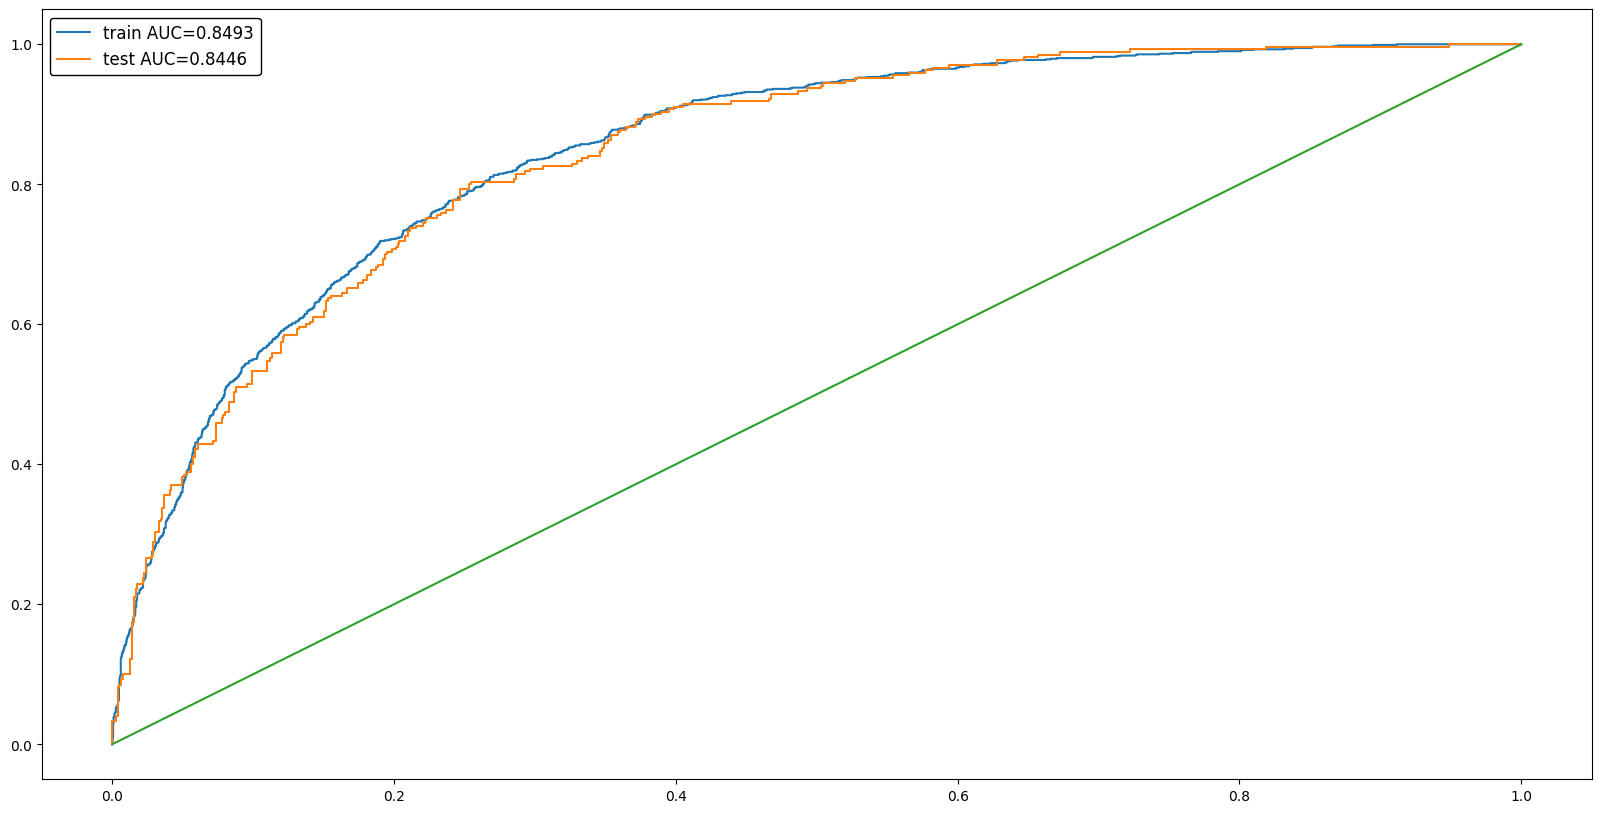

In [56]:
plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

## Градиентный бустинг

Адаптивный буст классификатор - `AdaBoostClassifier`

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

parametres = {"n_estimators": np.arange(10, 150, 10)}

clf = AdaBoostClassifier()

grid_search = GridSearchCV(clf, parametres, cv=5, scoring="roc_auc", refit=True)
# scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="roc_auc")
# scores.mean()
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])},
             scoring='roc_auc')

In [58]:
y_pr_test = grid_search.predict_proba(X_test)[:, -1]
pr_test_score = roc_auc_score(y_test, y_pr_test)
pr_test_score

0.8442368483132815

`AdaBoostClassifier` дал точность roc_auc = 0.8442 тесте

In [62]:
# если этого модуля нет, то нужно раскомментировать следующую строчку и запустить
!pip install xgboost

In [66]:
!pip install --upgrade xgboost

In [67]:
import xgboost
from xgboost import XGBClassifier

In [70]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
boosting_model = xgboost.XGBClassifier()


boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

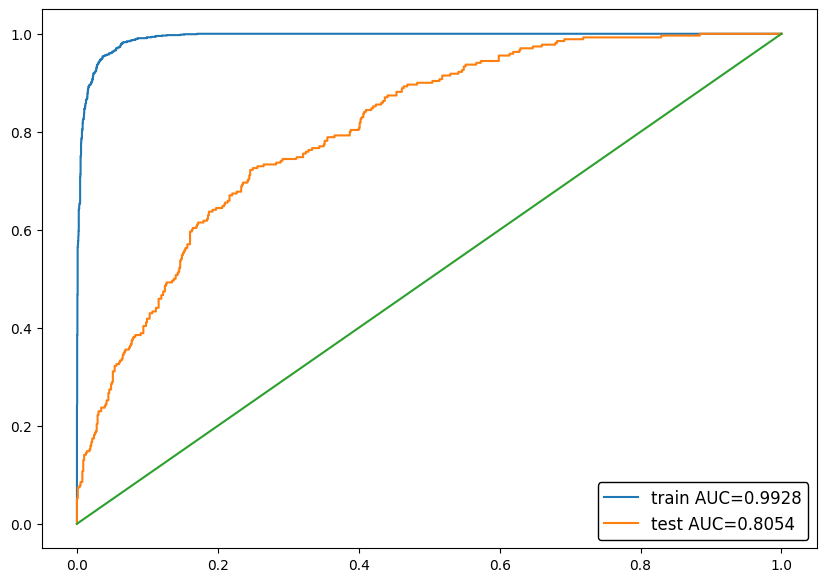

In [74]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Градиентный бустинг от Яндекса

In [75]:
# если этого модуля нет, то нужно раскомментировать следующую строчку и запустить
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [76]:
import catboost # документация: https://catboost.ai/docs

In [77]:
X_origin = data.iloc[:, :-1]

In [78]:
X_origin.shape

(5273, 19)

In [79]:

categorical_indices = [data.columns.get_loc(feature) for feature in cat_cols]

print(categorical_indices)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [80]:
# CatBoost умеет работать с категориальными признаками сам
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values,
                                                       train_size=0.8,
                                                       random_state=42)

In [81]:
boosting_model = catboost.CatBoostClassifier(random_state=42, n_estimators=200, eval_metric='AUC', auto_class_weights='SqrtBalanced',
                                             cat_features=categorical_indices, verbose=0)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

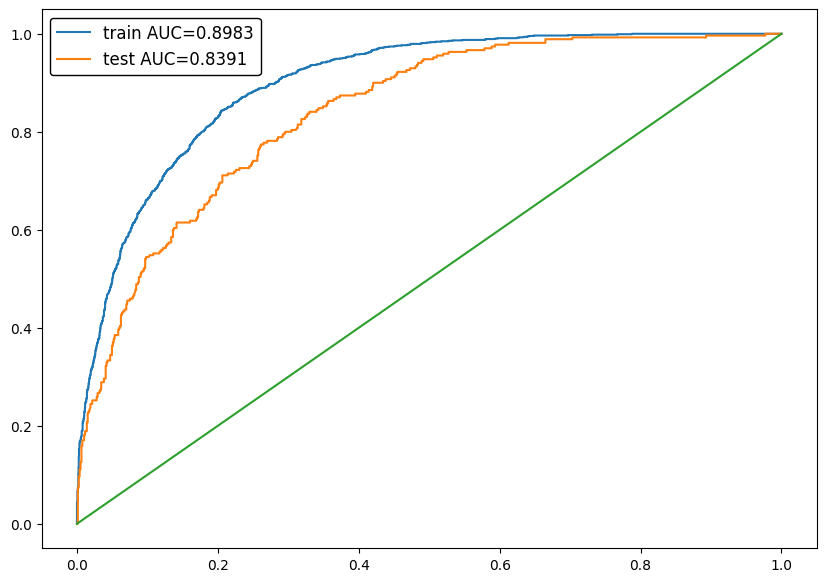

In [82]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

<h1>Итог:</h1>

<h3>Из стартовых данных были выкинуты пропуски и, где было необходимо, изменены типы данных. Категориальные признаки были закодированы с помощью pd.get_dummies()</h3>

<h3>Были опробованы методы Логистической регресии, К ближайших сосейдей, Дерево реший, Случайный лес, для которых были найдены оптимальные параметры. Так же опробован подход стекинга, в который вошли вышепречисленные модели с логистической регрессией в качестве решающего классификатора, а также адаптивный и обычный градиентный бустинг</h3>

<h1>Вывод:</h1>

<h3>Самым точным методом классификации оказался стекинг, где roc_auc = 0.8471</h3>

<br>
<br>

*Так же наблюдалось несбалансированность целевого признака*